### Section 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Set pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Section 2. Load and Inspect Data

#### 2.1 Load Data from CSV

In [2]:
# Path to CSV file
output_csv_path = r'C:\Users\16476\Downloads\ML-supervised_real_estate_data\data\csv\processed_data.csv'

# Load the data into a DataFrame
df = pd.read_csv(output_csv_path)

# Display the first few rows of the DataFrame
df.head()

,last_update_date,tags,permalink,status,list_date,open_houses,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,other_listings,branding.name,branding.photo,branding.type,source.agents.office_name,other_listings.rdc.listing_id,other_listings.rdc.listing_key,other_listings.rdc.status,other_listings.rdc.primary,community.advertisers,community.description.name
0,2023-09-19T20:52:50Z,"['carport', 'community_outdoor_space', 'cul_de...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,False,554950.0,9.074431e+09,"[{'tags': [{'label': 'house_view', 'probabilit...",False,False,2957241843,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,NaN,mls,1963.0,False,2023-09-18,False,2.0,False,False,10454.0,1821.0,2.0,NaN,False,1.0,NaN,3.0,single_family,True,False,False,False,False,False,False,False,False,False,False,basic_opt_in,99801.0,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,EXP Realty LLC - Southeast Alaska,False,Office,EXP Realty LLC - Southeast Alaska,2.957242e+09,NaN,sold,True,NaN,NaN
1,NaN,NaN,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,NaN,False,NaN,9.424984e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,Non-Member Office,2.957023e+09,NaN,off_market,False,NaN,NaN
2,NaN,NaN,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,NaN,False,NaN,9.479069e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
3,NaN,NaN,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,NaN,False,NaN,9.879332e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
4,NaN,NaN,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,NaN,False,NaN,9.521640e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958925e+

#### 2.2 Data Types and Initial Inspection

In [3]:
# Display all columns and their data types
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
last_update_date                          object
tags                                      object
permalink                                 object
status                                    object
list_date                                 object
open_houses                               object
list_price                                object
property_id                              float64
photos                                    object
community                                 object
virtual_tours                             object
listing_id                                object
price_reduced_amount                      object
matterport                                object
primary_photo.href                        object
source.plan_id                            object
source.spec_id                            object
source.type                               object
description.year_built                    object
description.baths_3qtr                 

#### 2.3 Handling Missing Values

In [4]:
# Check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

# Drop columns with more than 50% missing values
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_drop)

# Print dropped columns and remaining columns
print(f"Dropped columns: {columns_to_drop}")
print("Remaining columns after dropping:")
print(df.columns)

Percentage of missing values in each column:
last_update_date                          0.805762
tags                                      6.641436
permalink                                 0.390673
status                                    0.390673
list_date                                 5.249664
open_houses                               0.390673
list_price                                5.628128
property_id                               0.390673
photos                                    9.241851
community                                 2.954462
virtual_tours                            74.655109
listing_id                                5.249664
price_reduced_amount                     68.440972
matterport                                0.390673
primary_photo.href                        9.620315
source.plan_id                           17.897693
source.spec_id                           17.897693
source.type                               5.359541
description.year_built               

### Section 3. Data Cleaning and Preprocessing

#### 3.1 Drop Irrelevant Columns

In [5]:
# List of columns to drop due to irrelevance to the target variable
columns_to_drop = [
    'last_update_date', 'permalink', 'status', 'open_houses', 'list_price', 
    'property_id', 'photos', 'community', 'listing_id', 'matterport', 
    'primary_photo.href', 'source.plan_id', 'source.spec_id', 'source.type', 
    'location.street_view_url', 'matterport', 'description.name', 'description.baths_1qtr', 
    'lead_attributes.show_contact_an_agent', 'flags.is_new_construction', 'flags.is_for_rent', 
    'flags.is_subdivision', 'flags.is_contingent', 'flags.is_pending', 'flags.is_plan', 
    'flags.is_coming_soon', 'flags.is_new_listing', 'products.brand_name', 
    'location.address.postal_code', 'location.address.coordinate.lon', 'location.address.coordinate.lat', 
    'location.address.state_code', 'location.address.line', 'location.street_view_url', 
    'location.county.fips_code', 'branding.type', 'other_listings.rdc.listing_id', 
    'other_listings.rdc.listing_key', 'other_listings.rdc.status', 'other_listings.rdc.primary'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

#### 3.2 Convert Data Types

In [6]:
# Convert date columns to datetime and remove timezone information
df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce').dt.tz_localize(None)
df['description.sold_date'] = pd.to_datetime(df['description.sold_date'], errors='coerce').dt.tz_localize(None)

# Convert numerical columns to appropriate data types
cols_to_numeric = [
    'description.year_built', 'description.baths_3qtr', 'description.baths_full',
    'description.baths', 'description.garage', 'description.sold_price',
    'description.lot_sqft', 'description.sqft', 'description.stories', 'description.beds'
]
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# Convert categorical and boolean columns to appropriate types
categorical_cols = [
    'description.type', 'location.address.state', 'location.address.city',
    'location.county.name', 'branding.name'
]
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Convert boolean flags to boolean data types
boolean_cols = ['flags.is_price_reduced', 'flags.is_foreclosure']
for col in boolean_cols:
    df[col] = df[col].astype(bool)

# Display the updated DataFrame data types
print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
tags                              object
list_date                 datetime64[ns]
description.year_built             Int64
description.baths_3qtr             Int64
description.sold_date     datetime64[ns]
description.sold_price             Int64
description.baths_full             Int64
description.lot_sqft               Int64
description.sqft                   Int64
description.baths                  Int64
description.garage                 Int64
description.stories                Int64
description.beds                   Int64
description.type                  object
flags.is_price_reduced              bool
flags.is_foreclosure                bool
location.address.state            object
location.address.city             object
location.county.name              object
branding.name                     object
dtype: object


#### 3.3 Handle Missing Values

In [7]:
# Impute missing values for categorical columns using the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Impute missing values for numerical columns using the median
numerical_cols = df.select_dtypes(include=['Int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Impute missing values for datetime columns using midpoint
def calculate_midpoint_date(row):
    dates = pd.to_datetime([row['description.sold_date'], row['list_date']])
    return dates.mean()

df['midpoint_date'] = df.apply(calculate_midpoint_date, axis=1)
df['description.sold_date'].fillna(df['midpoint_date'], inplace=True)
df['list_date'].fillna(df['midpoint_date'], inplace=True)
df.drop(columns=['midpoint_date'], inplace=True)

C:\Users\16476\AppData\Local\Temp\ipykernel_10652\2852275476.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description.sold_date'].fillna(df['midpoint_date'], inplace=True)
C:\Users\16476\AppData\Local\Temp\ipykernel_10652\2852275476.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

#### 3.4 Handling Outliers

In [16]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Loop through numerical columns and detect outliers
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}:")
    print(outliers)
    print(f"Number of outliers in {col}: {len(outliers)}\n")

Outliers in description.year_built:
                                                   tags  \
1082  [central_air, city_view, community_outdoor_spa...   
1086  [central_air, city_view, community_outdoor_spa...   
1093  [community_outdoor_space, basement, rental_pro...   
1123  [central_air, city_view, community_outdoor_spa...   
1127  [central_air, city_view, community_outdoor_spa...   
1134  [community_outdoor_space, basement, rental_pro...   
1164  [central_air, city_view, community_outdoor_spa...   
1168  [central_air, city_view, community_outdoor_spa...   
1175  [community_outdoor_space, basement, rental_pro...   
1209  [central_air, city_view, community_outdoor_spa...   
1216  [community_outdoor_space, basement, rental_pro...   
1250  [central_air, city_view, community_outdoor_spa...   
1257  [community_outdoor_space, basement, rental_pro...   
1310  [central_air, dining_room, dishwasher, forced_...   
1351  [central_air, dining_room, dishwasher, forced_...   
1392  [central_air, 

### Section 4. Feauture Engineering

#### 4.1 Days on Market

In [8]:
# Calculate days on market
df['days_on_market'] = (df['description.sold_date'] - df['list_date']).dt.days

# Replace negative days on market with NaN
negative_days_mask = df['days_on_market'] < 0
df.loc[negative_days_mask, 'days_on_market'] = np.nan

# Drop original date columns
df.drop(columns=['description.sold_date', 'list_date'], inplace=True)

#### 4.2 Tags - One-Hot Encoding

In [9]:
# Convert 'tags' to list and handle missing values
def convert_to_list(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        elif isinstance(x, list):
            return x
        else:
            return []
    except (ValueError, SyntaxError):
        return []

df['tags'] = df['tags'].apply(lambda x: convert_to_list(x))

# One-hot encode tags
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(df['tags'])
tags_encoded_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)

# Concatenate the one-hot encoded tags
df = pd.concat([df, tags_encoded_df], axis=1)
df.drop('tags', axis=1, inplace=True)

TypeError: 'bool' object is not iterable

### Section 5. Exploratory Data Analysis (EDA)

#### 5.1 Summary Statistics

In [10]:
def summary_statistics(df, columns):
    print("Summary Statistics:")
    print(df[columns].describe())
    print("\nMissing Values:")
    print(df[columns].isnull().sum())

# List of columns for summary statistics
columns = [
    'description.year_built', 'description.baths_3qtr', 'description.sold_price',
    'description.baths_full', 'description.lot_sqft', 'description.sqft',
    'description.baths', 'description.garage', 'description.stories',
    'description.beds', 'days_on_market'
]

summary_statistics(df, columns)

Summary Statistics:
       description.year_built  description.baths_3qtr  description.sold_price  \
count             8191.000000             8191.000000            8.191000e+03   
mean              1969.565987                1.017092            3.948487e+05   
std                 33.222335                0.136951            6.344563e+05   
min               1828.000000                1.000000            3.080000e+02   
25%               1952.000000                1.000000            2.200000e+05   
50%               1975.000000                1.000000            3.140000e+05   
75%               1994.000000                1.000000            4.279000e+05   
max               2024.000000                3.000000            2.706500e+07   

       description.baths_full  description.lot_sqft  description.sqft  \
count             8191.000000          8.191000e+03       8191.000000   
mean                 1.899524          2.154577e+05       1902.179587   
std                  0.815322  

#### 5.2 Plot Distributions

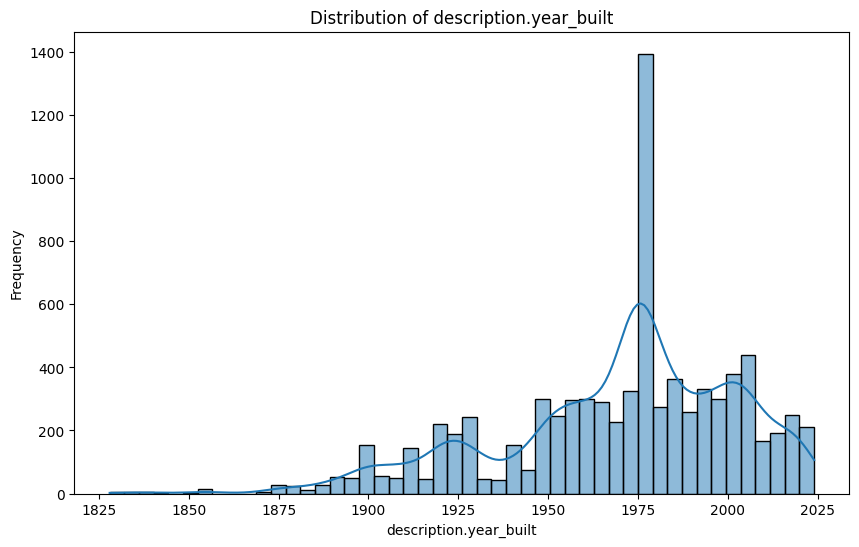

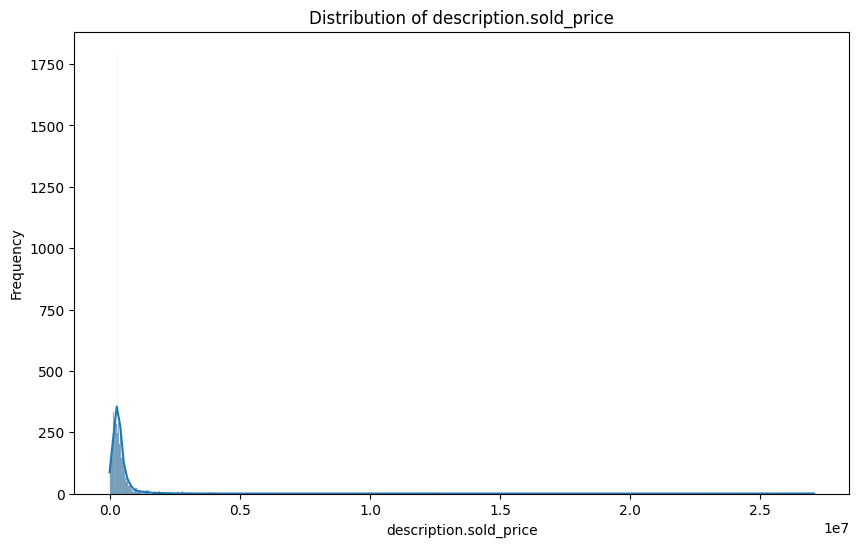

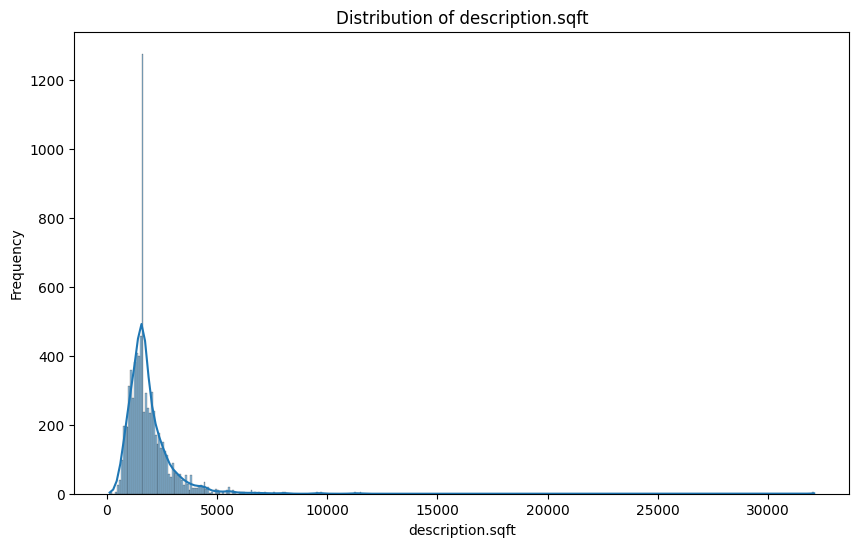

In [11]:
def plot_distribution(df, column, filename='plot.png'):
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.savefig(filename)
        plt.show()

plot_distribution(df, 'description.year_built', 'Year_Built_Distribution.png')
plot_distribution(df, 'description.sold_price', 'Sold_Price_Distribution.png')
plot_distribution(df, 'description.sqft', 'Sq_Ft_Distribution.png')

#### 5.3 Scatterplots

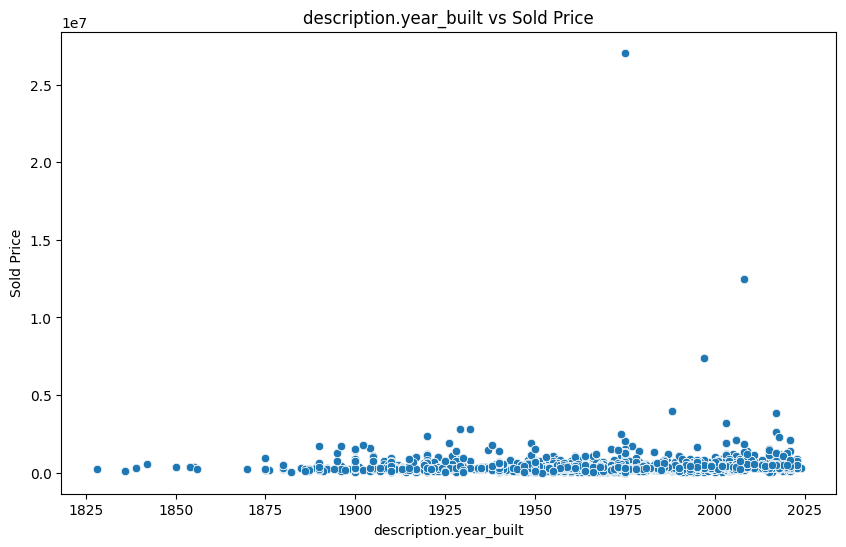

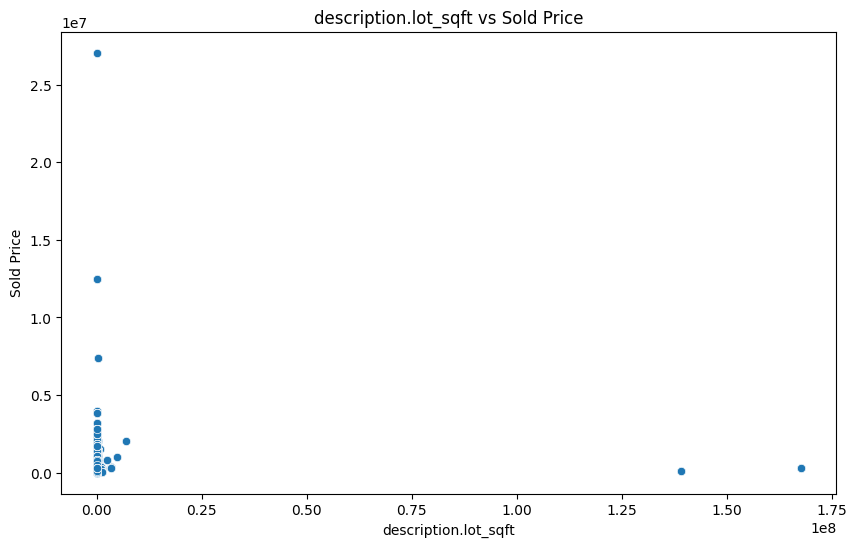

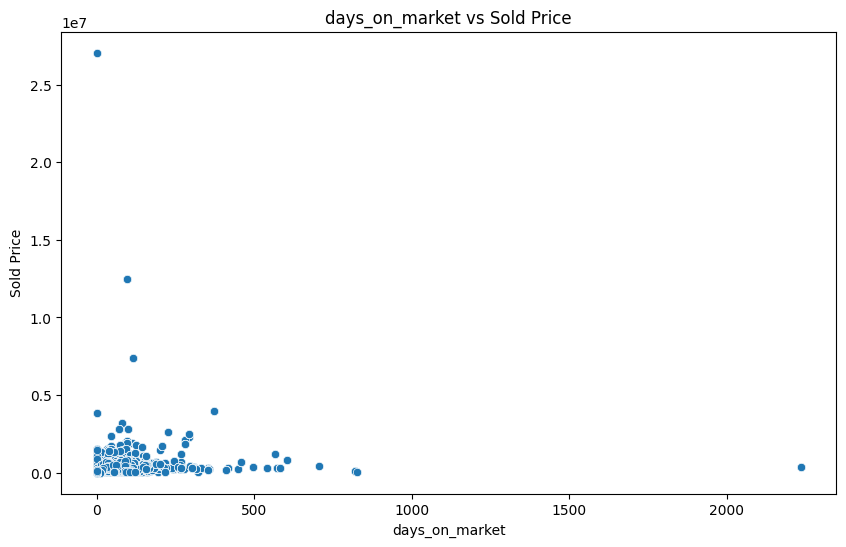

In [12]:
def plot_scatterplot(df, feature, filename='plot.png'):
    if feature in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['description.sold_price'])
        plt.title(f'{feature} vs Sold Price')
        plt.xlabel(feature)
        plt.ylabel('Sold Price')
        plt.savefig(filename)
        plt.show()

plot_scatterplot(df, 'description.year_built', 'Year_Built_Scatterplot.png')
plot_scatterplot(df, 'description.lot_sqft', 'Lot_SqFt_Scatterplot.png')
plot_scatterplot(df, 'days_on_market', 'Days_on_Market_Scatterplot.png')

#### 5.4 Correlation Heatmap

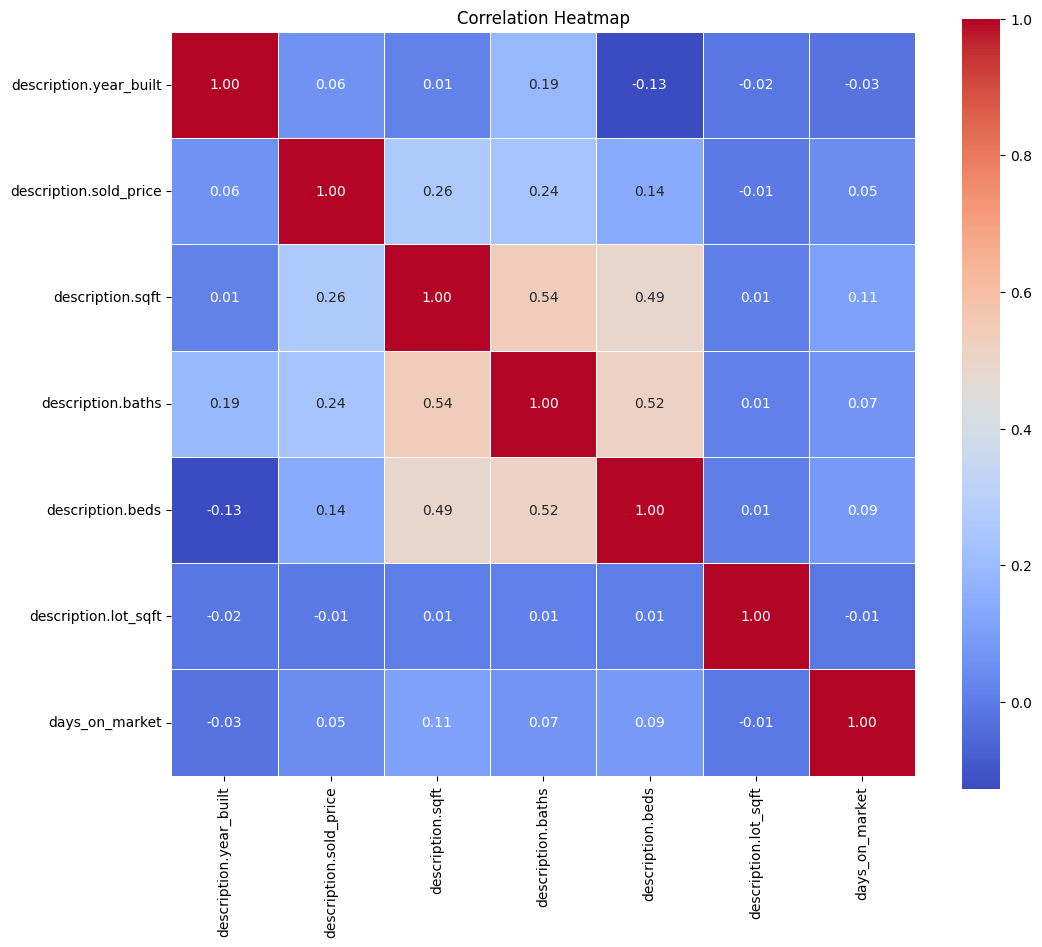

In [13]:
def plot_selected_correlation_heatmap(df, features, filename='Correlation_Heatmap.png'):
    corr = df[features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.savefig(filename)
    plt.show()

selected_features = [
    'description.year_built', 'description.sold_price', 'description.sqft',
    'description.baths', 'description.beds', 'description.lot_sqft',
    'days_on_market'
]

plot_selected_correlation_heatmap(df, selected_features, 'Correlation_Heatmap.png')

#### 5.5 Boxplots

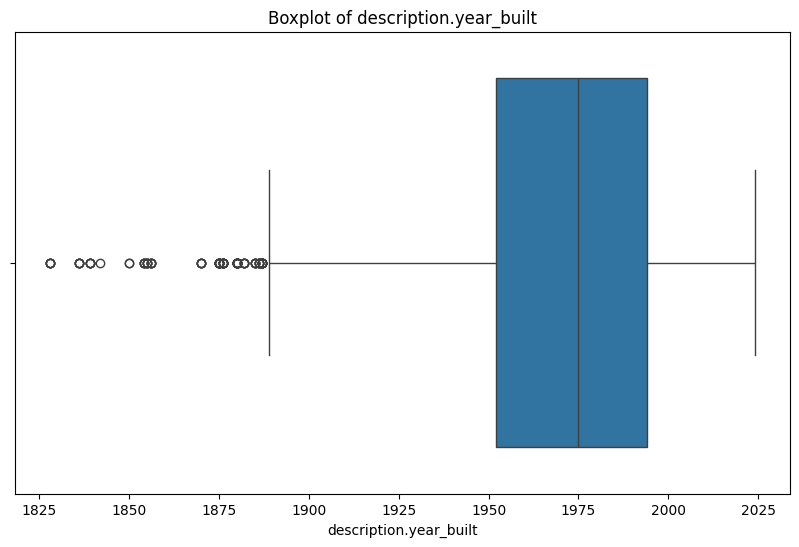

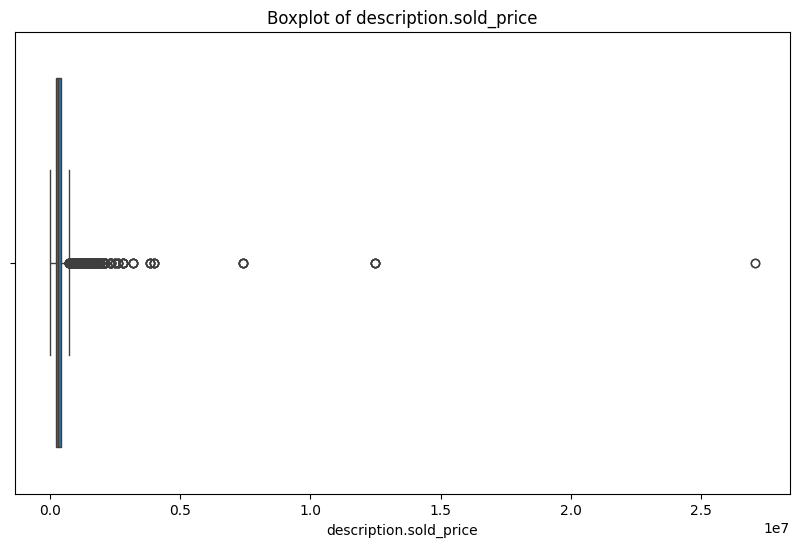

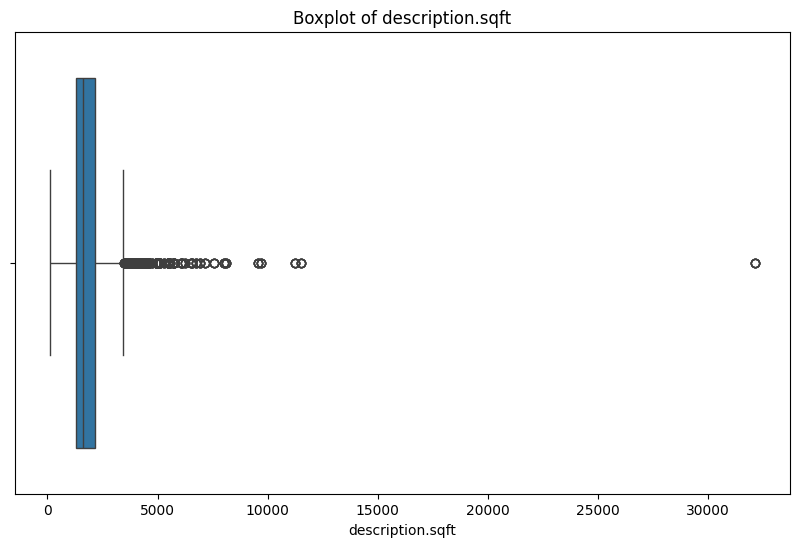

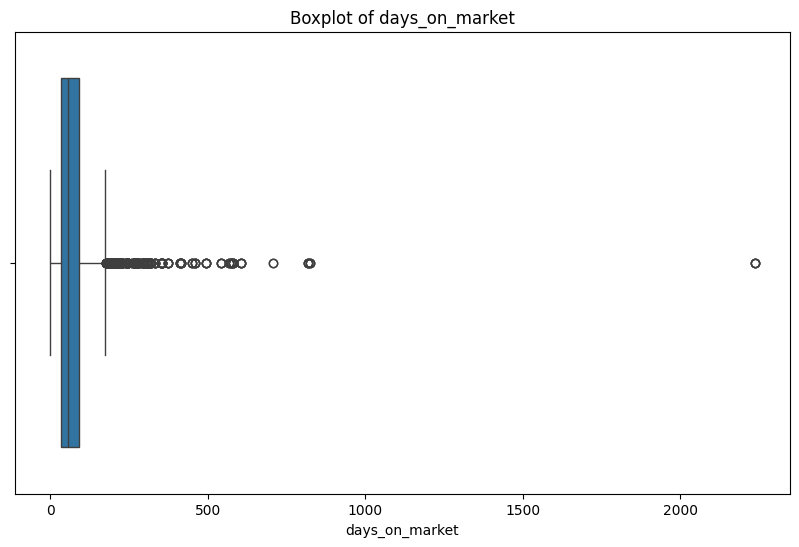

In [14]:
def plot_boxplot(df, column, filename='plot.png'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.savefig(filename)
    plt.show()

plot_boxplot(df, 'description.year_built', 'Year_Built_Boxplot.png')
plot_boxplot(df, 'description.sold_price', 'Sold_Price_Boxplot.png')
plot_boxplot(df, 'description.sqft', 'Sq_Ft_Boxplot.png')
plot_boxplot(df, 'days_on_market', 'Days_on_Market_Boxplot.png')